# Local Binary Pattern

Local Binary Pattern (LBP) is a simple yet very efficient texture operator which labels the pixels of an image by thresholding the neighborhood of each pixel and considers the result as a binary number. Due to its discriminative power and computational simplicity, LBP texture operator has become a popular approach in various applications. It can be seen as a unifying approach to the traditionally divergent statistical and structural models of texture analysis. Perhaps the most important property of the LBP operator in real-world applications is its robustness to monotonic gray-scale changes caused, for example, by illumination variations. Another important property is its computational simplicity, which makes it possible to analyze images in challenging real-time settings.

In [9]:
# import library
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import math
import cv2

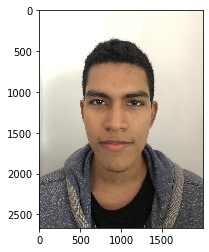

In [10]:
face = mpimg.imread("img/coloredDataSet/1-1.jpg")
img_face = np.asarray(face)
plt.imshow(face)

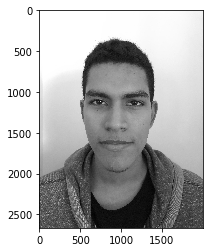

In [11]:
gray = cv2.cvtColor(face, cv2.COLOR_RGBA2GRAY)
imgplot = plt.imshow(gray, cmap='gray')

In [12]:
lbp_img = gray 
lbp_img

array([[253, 255, 255, ..., 243, 244, 243],
       [253, 255, 255, ..., 243, 244, 244],
       [253, 255, 255, ..., 243, 244, 244],
       ...,
       [ 62,  86,  82, ...,  64,  71,  66],
       [ 55,  73,  72, ...,  65,  71,  67],
       [ 81,  91,  81, ...,  63,  67,  63]], dtype=uint8)

(array([ 288967.,  291347.,  472003.,  522645.,  555139.,  478987.,
         263965.,  430697.,  690576., 1337674.]),
 array([  0. ,  25.5,  51. ,  76.5, 102. , 127.5, 153. , 178.5, 204. ,
        229.5, 255. ]),
 <a list of 10 Patch objects>)

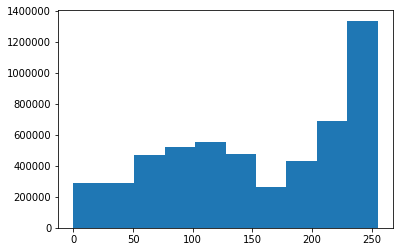

In [13]:
plt.hist(gray.ravel())

In [ ]:
def neighbours(x, y, radius, numNeighbours):
    neighbour = []
    
    for i in range(0,numNeighbours):
            
        t = (2 * math.pi * i) / numNeighbours;

        neighbourX = round(x + radius * math.cos(t));
        neighbourY = round(y - radius * math.sin(t));

        nPoint = [neighbourX,neighbourY]
        neighbour.append(nPoint);
            
    return neighbour

In [14]:
def middlepointValue(x, y, radius, numNeighbours):
    
    neighbours_list = neighbours(x, y, radius, numNeighbours)
    
    sum = 0;
    i = 0;
    
    for point in neighbours_list:
        
        aux = 0;

        if (gray[x][y]>=gray[point[0]][point[1]]):
            aux=1 
        
        if (aux == 1):
            sum += math.pow(2,i);
            
        i+=1
        
    return sum

In [ ]:
def lbp(radius,numNeighbours,img):
     
    width = len(img)
    height = len(img[0])
     
    
    print("Width ========> %a"%(width))
    print("height =======> %a"%(height))
    
    for x in range(radius,width-radius):
        for y in range(radius,height-radius):
            value = middlepointValue(x, y, radius, numNeighbours);
            
            if (value > 255):
                value = value / 256;
            
            lbp_img[x][y]=value
            
    print ("Finish Local Binary Pattern")

In [15]:
lbp(2,8,gray)
imgplot = plt.imshow(lbp_img, cmap='gray')

Width ========> 2666
height =======> 2000
Finish Local Binary Pattern


In [37]:
def SplitImage():
        
    listHistograms = [{},{},{},{}]
    

    width = len(lbp_img)
    height = len(lbp_img[0])
    
    for i in range (0,255):
        listHistograms[0][i]=0
        listHistograms[1][i]=0
        listHistograms[2][i]=0
        listHistograms[3][i]=0
        
    for x in range(0,width):
        for y in range(0,height):
                
            if (y <= height/2 and x <= width/2):
                    
                if lbp_img[x][y] in listHistograms[0]:
                    listHistograms[0][lbp_img[x][y]] += 1
                    
            elif (y > height / 2 and x <= width / 2):
                    
                if lbp_img[x][y] in listHistograms[1]:
                    listHistograms[1][lbp_img[x][y]] += 1
                    
            elif (y <= height / 2 and x > width / 2):
                    
                if lbp_img[x][y] in listHistograms[2]:
                    listHistograms[2][lbp_img[x][y]] += 1
                    
            elif (y > height/2 and x > width/2):
                    
                if lbp_img[x][y] in listHistograms[3]:
                    listHistograms[3][lbp_img[x][y]] += 1
                           
    return listHistograms;
        

In [38]:
data = SplitImage()
data

[{0: 10648,
  1: 1901,
  2: 3140,
  3: 2066,
  4: 3010,
  5: 623,
  6: 766,
  7: 532,
  8: 3047,
  9: 819,
  10: 1890,
  11: 1767,
  12: 1569,
  13: 395,
  14: 593,
  15: 651,
  16: 6536,
  17: 1366,
  18: 2867,
  19: 2031,
  20: 3809,
  21: 1004,
  22: 1009,
  23: 934,
  24: 2898,
  25: 922,
  26: 2777,
  27: 3491,
  28: 2510,
  29: 744,
  30: 1714,
  31: 2110,
  32: 12660,
  33: 2314,
  34: 5025,
  35: 3684,
  36: 7364,
  37: 1488,
  38: 1699,
  39: 1407,
  40: 4511,
  41: 1146,
  42: 3268,
  43: 3441,
  44: 4512,
  45: 1195,
  46: 1608,
  47: 1830,
  48: 6092,
  49: 1486,
  50: 2890,
  51: 2316,
  52: 9311,
  53: 2750,
  54: 3111,
  55: 3201,
  56: 3815,
  57: 1234,
  58: 3638,
  59: 4804,
  60: 5469,
  61: 1543,
  62: 4122,
  63: 5437,
  64: 4923,
  65: 1589,
  66: 2799,
  67: 3083,
  68: 2736,
  69: 951,
  70: 984,
  71: 1176,
  72: 1824,
  73: 763,
  74: 2037,
  75: 2899,
  76: 1889,
  77: 776,
  78: 1158,
  79: 1794,
  80: 2051,
  81: 736,
  82: 1550,
  83: 1796,
  84: 2181,
  8